TCD 2024
TP0

Exercices from 1 to 4

In [1]:
import numpy as np
import sounddevice as sd
from scipy.io import wavfile
from sklearn.preprocessing import MinMaxScaler

#1
filename = '/Users/PC/Desktop/TCD/Repositório/TP0/drumloop.wav'
[fs, data] = wavfile.read(filename)

#2 print the table
print('Audio Size:', data.shape, '\nSampling Frequency:',fs)

scaler = MinMaxScaler((-1, 1))
scaler.fit(data)
data = scaler.transform(data)

#3 play the audio
#sd.play(data,fs)
#sd.wait()

Audio Size: (324864, 2) 
Sampling Frequency: 44100


Exercice 5

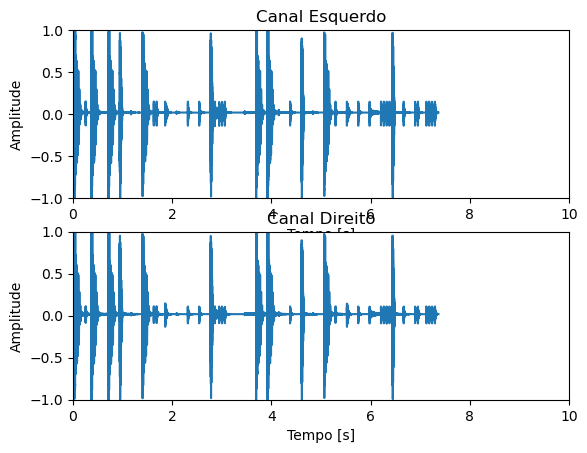

In [2]:
def visualizationI(data,fs):
    import matplotlib.pyplot as plt
    import numpy as np

    samples = len(data)
    t = np.arange(0,samples) # The last value not included in the array
    t = t/fs

    plt.figure(1)
    if len(data.shape)==2: # estereos -> 2D
        plt.subplot(211)
        plt.plot(t,data[:,0])
        plt.xlabel('Tempo [s]')
        plt.ylabel('Amplitude')
        plt.title('Canal Esquerdo')
        # 6)
        plt.axis([0,10,-1,1])
        plt.subplot(212)
        plt.plot(t,data[:,1])
        plt.xlabel('Tempo [s]')
        plt.ylabel('Amplitude')
        plt.title('Canal Direito')
        # 6)
        plt.axis([0,10,-1,1])
        plt.show()
    else:             # mono ---> 1D
        plt.plot(t,data)
        plt.xlabel('Tempo [s]')
        plt.ylabel('Amplitude')
        plt.title('Canal Único')
        # 6)
        plt.axis([0,10,-1,1])
        plt.show()

visualizationI(data,fs)

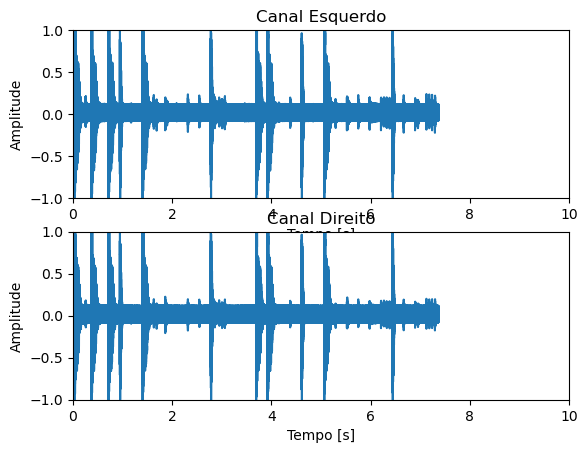

In [3]:
# 7) TODO
def add_noise(data,Amp):
    import numpy as np
    # add uniform noise to the data. return original data + noise.

    # generate noise
    noise = np.random.uniform(-Amp,Amp,len(data))
    
    # add noise to the original data
    if len(data.shape)==2:
        data[:,0] = data[:,0] + noise
        data[:,1] = data[:,1] + noise
    
    else:
        data = data + noise

    return data

ex7 = add_noise(data,0.1)
visualizationI(ex7,fs)

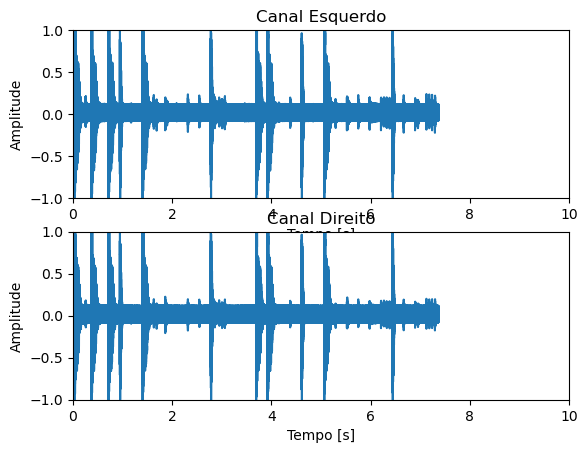

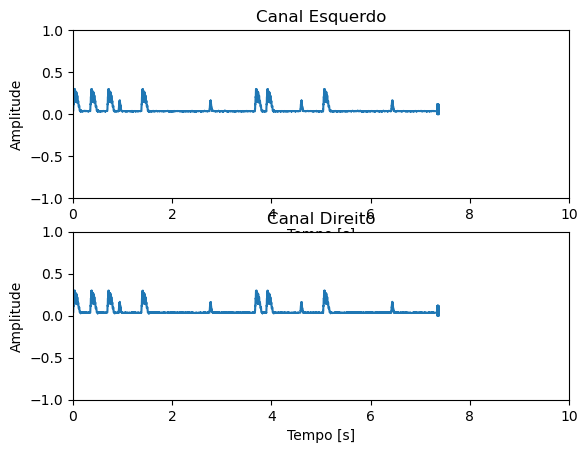

In [4]:
# 8) TODO
def contour(data,fs,W):
    dataRect = data.copy()
    dataRect[dataRect<0]=0

    for i in range(0,len(dataRect)-W):
        dataRect[i] = np.mean(dataRect[i:i+W])

    return dataRect

# Show the original and the contour
visualizationI(data,fs)
ex8 = contour(data,fs,1000)
visualizationI(ex8,fs)



In [5]:
# 9) TODO